
### HW 1: Exploratory Data Analysis and Data Preparation - Task 2


Setting up the system for the remaining tasks for Homework

In [ ]:
# Imports required to load the datasets from S3 Bucket
import os
import boto3
from boto3 import client

# Additional imports required for the homework tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

Extracting the list of files from the S3 Bucket using the code that was already provided

In [ ]:
bucketname = "cmu-dshs-diabetes-data"
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketname)
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object)

s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ) pacientes.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 2 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 3 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='DataDictionary version 2.xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='I Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='II Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='III Datos CMU (ENC).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='IV Datos CMU (BAL).xlsx')


In [ ]:
# Using the client system in the boto3 
conn = client('s3')  
for key in conn.list_objects(Bucket=bucketname)['Contents']:
    print(key['Key'])

Balance - Tablas (Parte 1 ) pacientes.csv
Balance - Tablas (Parte 1 ).xlsx
Balance - Tablas (Parte 2 ).xlsx
Balance - Tablas (Parte 3 ).xlsx
DataDictionary version 2.xlsx
I Datos CMU (BAL).xlsx
II Datos CMU (BAL).xlsx
III Datos CMU (ENC).xlsx
IV Datos CMU (BAL).xlsx


##### Task 2  - Profiling Data  -  II Datos CMU (BAL)

Intial task is to see all the sheets that are available in the II Datos Excel Sheet and then work on the major sheets as mentioned in the project writeup

In [ ]:
# Find all the sheets that are available in the II Datos Excel Sheet
filename = 'II Datos CMU (BAL).xlsx'
dataframe =  pd.ExcelFile('s3://{}/{}'.format(bucketname, filename))#, encoding = 'ISO-8859-1')

dataframe.sheet_names

['nutriciondietaspacientes',
 'nutricionevaluacionnutricional',
 'nutricionnotasseguimiento',
 'nutricionplanesnutricionales',
 'nutricionvaloracioninicial',
 'referenciasmedicas',
 'testaudit',
 'respaudit',
 'testcar',
 'respcar',
 'testfagestrom',
 'respfagestrom',
 'testhamilton',
 'resphamilton',
 'retinografias']

Created functions that could be used agiain to navigate and profile similar data sheets

In [ ]:
# Function to read the data from excel sheet
def read_data_from_excel(filename,sheetname):
    dataframe = pd.read_excel('s3://{}/{}'.format(bucketname, filename), sheetname, encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to read the data from csv file
def read_data_from_csv(filename):
    dataframe = pd.read_csv('s3://{}/{}'.format(bucketname, filename), encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to display basic data info
def display_basic_data(dataframe):
    #Get the first 5 rows of the CSV
    display(dataframe.head(5))
    dataframe.info()

#### 1. Working on the static sheet that has 'Patient Nutrition Diets'

In [ ]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutriciondietaspacientes'
nutri_diet_df = read_data_from_excel(filename,sheetname)

In [ ]:
# Display basic data
display_basic_data(nutri_diet_df)

,IdDietaPaciente,IdPaciente,Fecha,Hora,Usuario,Tipo,Calorias,D1,D2,D3,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,1,770,2013-03-06,13:34:54,707ccb674ec55ff9aa6114e0cd221546,1,1500,Queso cottage con fruta 3C de queso cottage1 t...,Yogurt con fruta1 tza de yogurt light 1 tza de...,Cereal1 tza de leche light1 tza de cereal inte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,770,2013-03-06,13:35:04,707ccb674ec55ff9aa6114e0cd221546,1,1500,Queso cottage con fruta 3C de queso cottage1 t...,Yogurt con fruta1 tza de yogurt light 1 tza de...,Cereal1 tza de leche light1 tza de cereal inte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,770,2013-03-06,13:35:11,707ccb674ec55ff9aa6114e0cd221546,1,1500,Queso cottage con fruta 3C de queso cottage1 t...,Yogurt con fruta1 tza de yogurt light 1 tza de...,Cereal1 tza de leche light1 tza de cereal inte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,770,2013-03-06,13:41:01,707ccb674ec55ff9aa6114e0cd221546,1,1700,Leche y galletas1 tza de leche light 3 galleta...,Yogurt con fruta1 tza de yogurt light 1 tza de...,Licuado de fruta1 tza de leche light 1 tza de ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,770,2013-03-06,16:21:04,707ccb674ec55ff9aa6114e0cd221546,1,1200,Licuado de frutas1 tza de leche light1 tza de ...,Avena1 tza de leche light2C de avena 1 manzana...,Cereal1 tza de leche light1/2 tza de cereal in...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26644 entries, 0 to 26643
Data columns (total 44 columns):
IdDietaPaciente         26644 non-null int64
IdPaciente              26644 non-null int64
Fecha                   26644 non-null datetime64[ns]
Hora                    26644 non-null object
Usuario                 26644 non-null object
Tipo                    26644 non-null int64
Calorias                26644 non-null int64
D1                      26639 non-null object
D2                      26636 non-null object
D3                      26639 non-null object
D4                      26634 non-null object
D5                      26632 non-null object
CO1                     26641 non-null object
CO2                     26641 non-null object
CO3                     26642 non-null object
CO4                     26635 non-null object
CO5                     26639 non-null object
CE1                     26640 non-null object
CE2                     26639 non-null object
CE3          

As we can see above the columns ranging from D6 to Unnamed: 43 have a lot of missing values i.e. Almost 60-100%. Therefore we can say that these columns might not be very useful in determing the predictors. Apart from this most of the other columns talk about the dietary intake i.e. the columns D1 to Extras. These columns can tell about different types of food allowed but will require segmentation using NLP to identify the major food items in the diet.

In [ ]:
# Using the built in function 'Describe' to look at the columns in dataframe
nutri_diet_df.describe()

,IdDietaPaciente,IdPaciente,Tipo,Calorias,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
count,26644.000000,26644.000000,26644.000000,26644.000000,0.0,0.0,0.0,0.0
mean,14226.969712,7495.088125,2.060877,1594.546615,NaN,NaN,NaN,NaN
std,8281.905262,3851.439901,0.732238,213.478001,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,1100.000000,NaN,NaN,NaN,NaN
25%,7060.750000,4540.750000,2.000000,1400.000000,NaN,NaN,NaN,NaN
50%,14181.500000,7639.500000,2.000000,1600.000000,NaN,NaN,NaN,NaN
75%,21397.250000,10513.250000,3.000000,1700.000000,NaN,NaN,NaN,NaN
max,28595.000000,15061.000000,3.000000,2100.000000,NaN,NaN,NaN,NaN


From the above describe report we can see the columns that have numerical values.

As we can see that the only 2 columns apart from ID re Tipo i.e Kind and Calorias. As per the dat a dictionary tipo is supposed to be obviate hence we will try to look into Calorias to see if we can get any insights from the calorie intakes

In [ ]:
# Below are the total no. of records and features in the table
print('Total no of Records:'+str(nutri_diet_df.shape[0]))
print('Total no of features:'+str(nutri_diet_df.shape[1]))

Total no of Records:26644
Total no of features:44


As we can see in the header info printed above we saw that the Patient ID was repaeting hence we try to see the total no. of patients for whom the records have been maintained

In [ ]:
print('Total no. of patient whose Diet Records have been maintained:'+str(len(nutri_diet_df.IdPaciente.unique())))

Total no. of patient whose Diet Records have been maintained:12035


Using the above value we can no calculate the average no. of diets available for each patient

In [ ]:
avg_diet_plans = nutri_diet_df.shape[0]/len(nutri_diet_df.IdPaciente.unique())
print('Avg. no. of diet plans provided to each patient:'+str(round(avg_diet_plans, 2)))

Avg. no. of diet plans provided to each patient:2.21


Below we are using a BoxPlot to find out the spread of the no. of diets available for each patient
As we can see that the mean is 2.2 we can also see that for some patients we have around 30 records. This could be possible but makes it difficult for us to aggregate the diet of that patient.

One possible solution could be to take the latest record

In [ ]:
avg_pat_diet = pd.Index(nutri_diet_df.IdPaciente).value_counts()

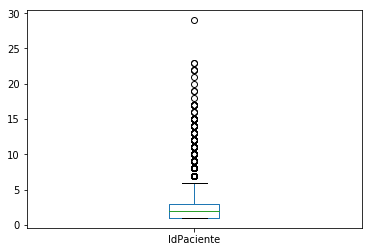

In [ ]:
avg_pat_diet.plot.box()

Apart from this as we mentioned that we have the calorie intake of the pateints. Before using the calories we take a weighted average of the calorie intake for each of the patients.

To understand more about the calorie intake we have used the below plots

1. Box plot: This tells us the mean and standard deviation of the calories. Also shows if there are any outliers
2. Distribution plot: This shows us the distribution of the calories

As we can see from both the plts we can say that the average calorie intake is normally distributed with no outlier and has a mean at 1600 calories

In [ ]:
avg_calorie_intake = nutri_diet_df.groupby('IdPaciente')['Calorias'].agg(np.mean)

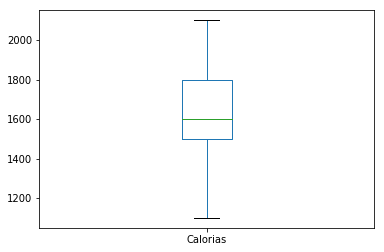

In [ ]:
avg_calorie_intake.plot.box()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


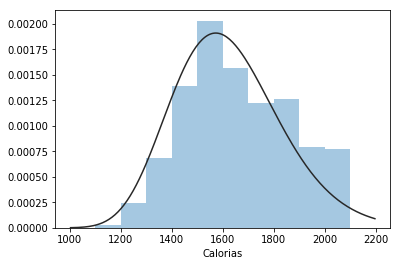

In [ ]:
sns.distplot(avg_calorie_intake, kde=False, fit=stats.gamma, bins = 10)

#### 2. Working on the 'Nutritional Assessment' of the Patients

In [ ]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutricionevaluacionnutricional'
nutri_assess_df = read_data_from_excel(filename,sheetname)

In [ ]:
# Display basic data
display_basic_data(nutri_assess_df)

,IdEvaluacionNutricional,IdPaciente,Fecha,Hora,Usuario,Peso,Talla,CC,CA,Muneca,PorGrasa,SillaRuedasNoErguido,Pantorrilla,AlturaRodilla,Brazo,PliegueCutaneo,MediaBrazada,IMC
0,1,528,2013-10-05,15:56:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,0.0,0.0,16.0,0.0,1,32.6,51.0,25.5,0.1,82.0,0.0
1,2,97,2012-03-07,00:00:00,e5fd4e2c7e689b482829a0ef1a359389,78.0,1.62,104.0,105.0,16.5,37.0,0,0.0,0.0,0.0,0.0,0.0,29.7
2,5,244,2012-05-10,10:15:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,99.5,103.0,18.9,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,244,2012-07-12,10:00:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,95.5,93.0,18.9,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,244,2012-08-09,09:25:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,94.0,95.5,18.9,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 18 columns):
IdEvaluacionNutricional    54460 non-null int64
IdPaciente                 54460 non-null int64
Fecha                      54460 non-null datetime64[ns]
Hora                       54460 non-null object
Usuario                    54460 non-null object
Peso                       54460 non-null float64
Talla                      54460 non-null float64
CC                         54460 non-null float64
CA                         54460 non-null float64
Muneca                     54460 non-null float64
PorGrasa                   54460 non-null float64
SillaRuedasNoErguido       54460 non-null int64
Pantorrilla                54460 non-null float64
AlturaRodilla              54460 non-null float64
Brazo                      54460 non-null float64
PliegueCutaneo             54460 non-null float64
MediaBrazada               54460 non-null float64
IMC                        54460 non-null 

As we can see above the dataset has a lot of numerical data. Each of these data has the assessment values of the patient. Like weight, BMI, height, Carbohydrate calorie count, and the size of the wrist, calves and also has data if they equire wheelchair or not.

This dataset seems to be useful as they are no Null values. However, when we try to decribe these column then we can see that the range is not very meaningful. 
For example: Weight of patients ranges from 0-1000. Seems like in case the weight wasn't assessed then it was entered as 0. Also we do not know about the metrics for the same. Hence to use these parameters we might need to replace the values using mean or other approaches

In [ ]:
# Using the built in function 'Describe' to look at the columns in dataframe
nutri_assess_df.describe()

,IdEvaluacionNutricional,IdPaciente,Peso,Talla,CC,CA,Muneca,PorGrasa,SillaRuedasNoErguido,Pantorrilla,AlturaRodilla,Brazo,PliegueCutaneo,MediaBrazada,IMC
count,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000,54460.000000
mean,27395.721318,6784.464378,78.850883,1.638952,99.305464,3.962936,4.902453,1.938207,0.000441,0.026798,0.014956,0.010402,0.007516,0.026754,29.836549
std,15807.726742,3733.759644,25.172434,2.126021,20.126584,20.034638,10.958097,8.148082,0.020988,3.533984,0.852119,0.587539,0.543622,1.470562,9.205866
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13719.750000,3952.500000,66.400000,1.540000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.940000
50%,27383.500000,6661.500000,76.600000,1.610000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.120000
75%,41082.250000,9550.000000,88.000000,1.690000,108.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.912500
max,54799.000000,15061.000000,999.990000,177.000000,999.999000,166.500000,999.999000,93.300000,1.000000,810.001000,61.000000,42.500000,74.000000,97.000000,489.010000


In [ ]:
# Below are the total no. of records and features in the table
print('Total no of Records:'+str(nutri_assess_df.shape[0]))
print('Total no of features:'+str(nutri_assess_df.shape[1]))

Total no of Records:54460
Total no of features:18


In [ ]:
# Calculating the no. of patients who have been assessed
print('Total no of unique patient records:'+str(len(nutri_assess_df.IdPaciente.unique())))

Total no of unique patient records:12368


Below are the two descriptive analaysis:

The dataset that we have ranges from 2011 - 2016

We can use the above calculated values to see the average no. of assessments conducted for each patient

In [ ]:
date_min = str(nutri_assess_df.Fecha.min())[:4]
date_max = str(nutri_assess_df.Fecha.max())[:4]
avg_assess_per_patient = nutri_assess_df.shape[0] /len(nutri_assess_df.IdPaciente.unique())

print('On an average the no of assessments per patient is:'+str(round(avg_assess_per_patient,2)))
print('Date range:'+date_min+'-'+date_max)

On an average the no of assessments per patient is:4.4
Date range:2011-2016


We tried to plot the no. of assessments conducted over the years and it seems like the no. of assessments conducted over the years have increased.

This could be due to 3 reasons:

1. The clinic is conducting more frequent assements
2. Patients want to get assessed more frequently
3. Total no. of patients as well has increased

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


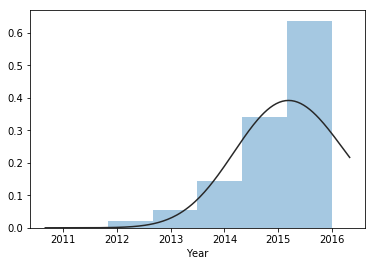

In [ ]:
nutri_assess_df['Year'] = pd.DatetimeIndex(nutri_assess_df.Fecha).year 
sns.distplot(nutri_assess_df['Year'], kde=False, fit=stats.gamma, bins = 6)

As we can see in the below bar plot the that the total no. of patients has also exponentially increase which is the driving force for the increasing no. of assessment.

This tells us that the no. pf patients at CDA have increased over the years

In [ ]:
avg_patients = nutri_assess_df.groupby('Year')['IdPaciente'].nunique().reset_index().rename(columns={'IdPaciente':'Count_Patients'}).reindex(columns=['Year','Count_Patients'])
print(avg_patients['Count_Patients'])

0      12
1     469
2     987
3    2166
4    4489
5    8085
Name: Count_Patients, dtype: int64


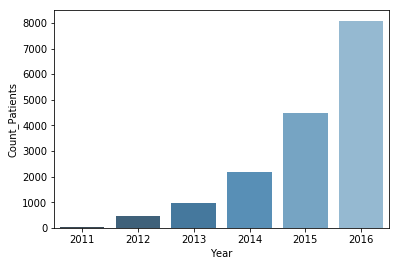

In [ ]:
ax = sns.barplot(x=avg_patients['Year'] , y=avg_patients['Count_Patients'], 
                 palette="Blues_d")

As mentioned at the beginning for the explanation of the basic data on this sheet. We tried to see if we could use box plots to identify the mean, SD and Outliers for each of the columns that are measured as a part of the assessment.

As we can see that there are alot of outliers in the dataset, which needs to be assesed considering the medical metrics to understand the significance (Need to discuss with subject matter experts in medical industry to better understand and come up with a strategy to treat this data efficiently). Also from the below figure we can infer that the measurment of the feature follow differnt scales hence we normalized the data using Min-Max strategy to bring the feature to the same scale so that they can be readily used to develop statistical models.

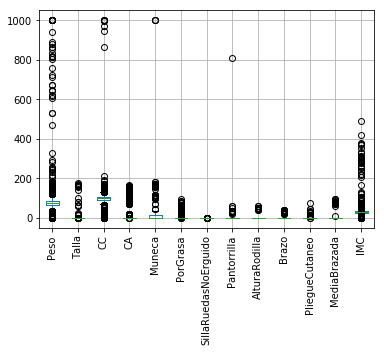

In [ ]:
boxplot = nutri_assess_df.boxplot(column=['Peso','Talla','CC','CA','Muneca','PorGrasa','SillaRuedasNoErguido','Pantorrilla','AlturaRodilla',
                             'Brazo','PliegueCutaneo','MediaBrazada','IMC'],rot=90)

In [ ]:
x = nutri_assess_df.iloc[:,5:-1]
# Standardizing similar to calculating z score
std_scale = preprocessing.MinMaxScaler().fit_transform(x)
x.loc[:] = std_scale

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


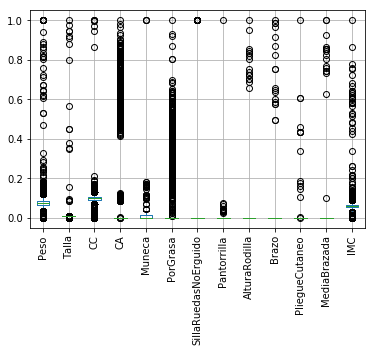

In [ ]:
boxplot = x.boxplot(rot = 90)

#### 3. Working on the data set for 'Nutrition follow-up Notes'

In [ ]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutricionnotasseguimiento'
nutri_notes_df = read_data_from_excel(filename,sheetname)

In [ ]:
# Display basic data
display_basic_data(nutri_notes_df)

,IdNotaSeguimientoNutricional,IdPaciente,Usuario,DiagnosticoNutricional,DistribucionCalorica,NotaNutricional,DietaPaciente,IMC,VariacionPeso,PesoInicial,PesoActual,CalculoPesoHistorico
0,2,244,e5fd4e2c7e689b482829a0ef1a359389,NaN,1515KCAL HCO57% PS18% LP25%,Se resolvieron dudas de la alimentación e inte...,2012-07-12 00:00:00,NaN,NaN,NaN,74.4,1
1,3,244,e5fd4e2c7e689b482829a0ef1a359389,NaN,1515KCAL HCO57% PS18% LP25%,"Si le ha estado haciendo cambios en el menú, s...",2012-08-09 00:00:00,NaN,NaN,NaN,72.5,1
2,4,244,e5fd4e2c7e689b482829a0ef1a359389,NaN,1605KCAL HCO57% PS18% LP25%L(1)F(4)V(3)CE(9)AO...,El paciente menciona que a veces se queda con ...,2012-12-13 00:00:00,NaN,NaN,NaN,0.0,1
3,5,630,62a6caf29f4dbbccc8413c7084b9bc67,NaN,1735KCAL HCO60% PS20% LP20%L(1)F(4)V(3)CE(10...,"El paciente se ha sentido mejor, pero menciona...",2013-01-04 00:00:00,NaN,NaN,NaN,0.0,1
4,6,631,62a6caf29f4dbbccc8413c7084b9bc67,NaN,1425KCAL HCO60% PS20% LP20%/ L(1)F(3)V(3)CE(7)...,La pacient emenciona no estar siguiendo la die...,2013-02-28 00:00:00,NaN,NaN,NaN,1000.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43990 entries, 0 to 43989
Data columns (total 12 columns):
IdNotaSeguimientoNutricional    43990 non-null int64
IdPaciente                      43990 non-null int64
Usuario                         43990 non-null object
DiagnosticoNutricional          0 non-null float64
DistribucionCalorica            17160 non-null object
NotaNutricional                 43990 non-null object
DietaPaciente                   43990 non-null object
IMC                             41867 non-null float64
VariacionPeso                   31436 non-null float64
PesoInicial                     32169 non-null float64
PesoActual                      43371 non-null float64
CalculoPesoHistorico            43990 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 4.0+ MB


In [ ]:
# Using the built in function 'Describe' to look at the columns in dataframe
nutri_notes_df.describe()

,IdNotaSeguimientoNutricional,IdPaciente,DiagnosticoNutricional,IMC,VariacionPeso,PesoInicial,PesoActual,CalculoPesoHistorico
count,43990.000000,43990.000000,0.0,41867.000000,31436.000000,32169.000000,43371.000000,43990.000000
mean,22686.336667,6554.952876,NaN,29.960779,-0.152325,77.062368,77.543942,0.999204
std,14403.865293,3726.475247,NaN,10.021105,27.131550,24.131147,26.431084,0.028196
min,2.000000,1.000000,NaN,0.000000,-100.000000,0.000000,0.000000,0.000000
25%,11230.250000,3790.000000,NaN,25.950000,-2.300000,65.700000,65.700000,1.000000
50%,22361.500000,6356.000000,NaN,29.070000,0.000000,76.100000,76.000000,1.000000
75%,33590.750000,9138.000000,NaN,32.790000,1.300000,87.500000,87.300000,1.000000
max,193955.000000,40279.000000,NaN,489.020000,1772.600000,869.000000,1000.000000,1.000000


In [ ]:
print('Total no of Records:'+str(nutri_notes_df.shape[0]))
print('Total no of features:'+str(nutri_notes_df.shape[1]))

Total no of Records:43990
Total no of features:12


One of teh columns from this dataset that seems to be useful could be distribution of calories that talks about the distribution of the calories as kcal, HCO, PS, LP and a lot more.
However this dataset has 2 drawbacks

1. There are just 1/3 of the rows that have values for this
2. Moreover as we can see below it is really difficult to split the dataset and hence that might require us to do some NLP preprocessing

In [ ]:
nutri_notes_df['Calorie_dist_initial'] = nutri_notes_df['DistribucionCalorica'].astype(str).str[:27]

In [ ]:
nutri_notes_df['Calorie_dist_initial'].head(5)

0    1515KCAL HCO57% PS18% LP25%
1    1515KCAL HCO57% PS18% LP25%
2    1605KCAL HCO57% PS18% LP25%
3      1735KCAL HCO60% PS20% LP2
4    1425KCAL HCO60% PS20% LP20%
Name: Calorie_dist_initial, dtype: object

Apart from this the dataset also maintains the value for Initial Weight and current weight. Using this we can see how the program has worked and was it successful for the patients.

Below we calculated the change in weight and for the values with NAN we replace it with the mean values.

As we can see below that there is a huge spread in the weight change. As we can see below there are a lot of abnormal values that are avialable ad as we do not know the true measure for them it is really difficult to gauge if they are outliers or not.

Hence we used a Pie Chart to just show the distribution of the patients who

1. Gained Weight
2. Lost Weight
3. Had no change

However this again requires us to understand the goal for each patient and hence required more detailed anaysis

In [ ]:
nutri_notes_df['Change_Weight'] = nutri_notes_df['PesoInicial'] - nutri_notes_df['PesoActual']
nutri_notes_df['Change_Weight'].fillna((nutri_notes_df['Change_Weight'].mean()), inplace=True)

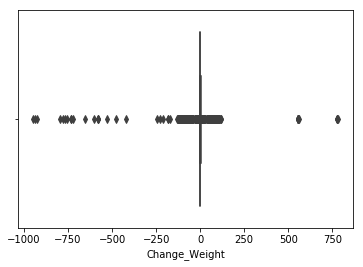

In [ ]:
sns.boxplot(nutri_notes_df['Change_Weight'])

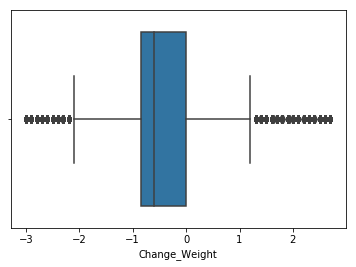

In [ ]:
# Plotting the outliers
Q1 = nutri_notes_df['Change_Weight'].quantile(0.25)
Q3 = nutri_notes_df['Change_Weight'].quantile(0.75)
IQR = Q3 - Q1
median_val = nutri_notes_df['Change_Weight'].median()
nutri_notes_df.loc[(((Q1 - 1.5 * IQR) >= nutri_notes_df['Change_Weight']) | (nutri_notes_df['Change_Weight'] >= (Q3 + 1.5 * IQR))), 'Change_Weight'] = median_val

#use boxplots to find if the outliers still exist
sns.boxplot(nutri_notes_df['Change_Weight'])

Weight Change Pie Chart

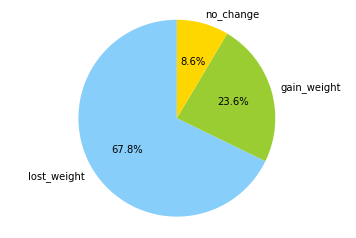

In [ ]:
lost_weight = nutri_notes_df.Change_Weight[nutri_notes_df['Change_Weight']<0].count()
gain_weight = nutri_notes_df.Change_Weight[nutri_notes_df['Change_Weight']>0].count()
no_change   = nutri_notes_df.Change_Weight[nutri_notes_df['Change_Weight']==0].count()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'lost_weight', 'gain_weight', 'no_change'
sizes = [(lost_weight/nutri_notes_df.shape[0]*100),(gain_weight/nutri_notes_df.shape[0]*100),(no_change/nutri_notes_df.shape[0]*100)]
colors = ['lightskyblue','yellowgreen', 'gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 4. Working on 'nutrition plans' dataset

In [ ]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutricionplanesnutricionales'
nutri_plans_df = read_data_from_excel(filename,sheetname)

In [ ]:
# Display basic data
display_basic_data(nutri_plans_df)

,IdPlanMetasNutricionales,IdPaciente,Fecha,Meta,Objetivo,Evaluacion,Usuario
0,1,630,2012-11-29,CONTROL DE GLUCOSA Y PESO,DIETA HIPOCALÓRICA E HIPOGRASA PARA CONTROL DE...,MONITOREO,62a6caf29f4dbbccc8413c7084b9bc67
1,2,630,2012-11-29,MÉTODO DE EQUIVALENTES,VARIEDAD EN LA DIETA Y ELECCIÓN FUERA DE CASA,MONITOREO,62a6caf29f4dbbccc8413c7084b9bc67
2,3,631,2012-11-29,CONTROL DE GLUCOSA Y PESO,CONTROL DE LOS NIVELES DE GLUCOSA CON PLAN DE ...,MONITOREO,62a6caf29f4dbbccc8413c7084b9bc67
3,4,631,2012-11-29,SISTEMA DE EQUIVALENTES,VARIEDAD EN EL MENÚ Y ALIMENTOS RECOMENDADOS,MONITOREO,62a6caf29f4dbbccc8413c7084b9bc67
4,5,632,2012-12-18,"CONTROL DE GLUCOSA, DISLIPIDEMIA, HAS Y PESO","DIETA HOPOCALORICA, HIPOGRASA, RICA EN FIBRA, ...",MONITOREO,62a6caf29f4dbbccc8413c7084b9bc67


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 7 columns):
IdPlanMetasNutricionales    8061 non-null int64
IdPaciente                  8061 non-null int64
Fecha                       8061 non-null datetime64[ns]
Meta                        8045 non-null object
Objetivo                    8061 non-null object
Evaluacion                  8061 non-null object
Usuario                     8061 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 440.9+ KB


As we can see above this data set talks more about the goal, object and evaluation of each patient's nutrition plan. 

Most of the data is wordy and hence requires deeper analysis to understand the goals and using the evaluation method understand how many goals werea achieved and how many were not. 

However, we did an interesting analysis below which shouws that of the total patients whose diet on *53.1%* people had diet plans

In [ ]:
# Using the built in function 'Describe' to look at the columns in dataframe
nutri_plans_df.describe()

,IdPlanMetasNutricionales,IdPaciente
count,8061.000000,8061.000000
mean,4035.541868,6664.860439
std,2328.920248,4692.074192
min,1.000000,1.000000
25%,2020.000000,2168.000000
50%,4035.000000,6285.000000
75%,6052.000000,10789.000000
max,8068.000000,15061.000000


In [ ]:
print('Total no of Records:'+str(nutri_plans_df.shape[0]))
print('Total no of features:'+str(nutri_plans_df.shape[1]))

Total no of Records:8061
Total no of features:7


In [ ]:
print('Total no of unique patient records:'+str(len(nutri_plans_df.IdPaciente.unique())))

Total no of unique patient records:6391


In [ ]:
print('Total % of patients whose nutrition plans are monitored of all the patients who are given nutrition diets:'+str(round((len(nutri_plans_df.IdPaciente.unique())/len(nutri_diet_df.IdPaciente.unique())*100),2))+'%')

Total % of patients whose nutrition plans are monitored of all the patients who are given nutrition diets:53.1%


#### 5.'Initial Nutrition Assessments' dataset

In [ ]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutricionvaloracioninicial'
nutri_init_assess_df = read_data_from_excel(filename,sheetname)

In [ ]:
# Display basic data
display_basic_data(nutri_init_assess_df)

,IdValoracionNutricionalInicial,IdPaciente,Fecha,Hora,Usuario,QuienPreparaAlimentos,AlimentosDisgustan,EndulzanteUtilizado,AlteracionesDigestivas,AlteracionesDigestivasCuales,...,DistribucionCalorica,NotaNutricional,DietaPaciente,FactorActividad,Edad,IMC,Alcohol,AlcoholCantidad,Tabaco,TabacoCantidad
0,1,1,2012-11-01 00:00:00,10:04:00,d41d8cd98f00b204e9800998ecf8427e,SU SOBRINA,TODO LE GUSTA,SUSTITUTO DE AZUCAR,1.0,ESTREÑIMIENTO CRÓNICO,...,NaN,NaN,2012-11-01 00:00:00,1.2,86.0,24.382,ACTIVO,NaN,INACTIVO,HACE 25 AÑOS
1,2,2,2011-11-30 00:00:00,17:02:13,d41d8cd98f00b204e9800998ecf8427e,CONYUGE,"REPOLLO, CEBOLLA, TOMATE",SUSTITUTO DE AZUCAR,0.0,NaN,...,L(1)F(4)V(4)CE(12)LEG(1)AOA(8)GS(5),METADISMINUIR NIVEL DE GLUCOSA EN SANGRE Y TRI...,2011-11-30 00:00:00,1.2,41.0,33.515,ACTIVO,4 CERVEZAS POR SEMANA,ACTIVO,1 CIGARRO AL DIA DESDE HACE 10 AÑOS
2,3,3,2011-12-12 00:00:00,12:00:00,d41d8cd98f00b204e9800998ecf8427e,ELLA O EL ESPOSO,CARNE ROJA NI PESCADO,SUSTITUTO DE AZÚCAR,1.0,COLITIS/ ESTREÑIMIENTO/ DIARREA,...,NaN,NaN,NaN,1.2,69.0,25.521,AUSENTE,NaN,AUSENTE,NaN
3,4,4,2011-12-15 00:00:00,10:00:00,d41d8cd98f00b204e9800998ecf8427e,SU MAMÁ,"COLIFLOR, YOGURTH, PIÑA ACIDA Y FRESAS.",SUSTITUTO DE AZÚCAR,1.0,GASTRITIS EN EL AYUNO PROLONGADO,...,NaN,NaN,2011-12-15 00:00:00,1.2,36.0,39.730,ACTIVO,NaN,ACTIVO,NaN
4,5,5,2011-12-15 00:00:00,11:00:00,d41d8cd98f00b204e9800998ecf8427e,ESPOSA,PESCADO Y MARISCOS,SUSTITUTO DE AZÚCAR,1.0,A VECES GASES CUANDO COME MUCHO CONDIMENTO,...,L(1) F(5) V(5) CE (10) LEG(1) AOA (6) GS(6),NaN,2011-12-15 00:00:00,1.2,54.0,24.350,INACTIVO,ALCOHOLISMO QUE FUE TRATADO AA SUSPENDIDO EN 2005,AUSENTE,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12780 entries, 0 to 12779
Data columns (total 46 columns):
IdValoracionNutricionalInicial      12780 non-null int64
IdPaciente                          12780 non-null int64
Fecha                               12780 non-null object
Hora                                12780 non-null object
Usuario                             12780 non-null object
QuienPreparaAlimentos               12710 non-null object
AlimentosDisgustan                  12665 non-null object
EndulzanteUtilizado                 12490 non-null object
AlteracionesDigestivas              12770 non-null float64
AlteracionesDigestivasCuales        6719 non-null object
Alergias                            12770 non-null float64
AlergiasCuales                      1919 non-null object
Cafe                                12770 non-null float64
CafeTipo                            9147 non-null object
CafeCantidad                        9171 non-null object
Refrescos               

As we can see above there is a lot of good information that is available for this data

In [ ]:
# Using the built in function 'Describe' to look at the columns in dataframe
nutri_init_assess_df.describe()

,IdValoracionNutricionalInicial,IdPaciente,AlteracionesDigestivas,Alergias,Cafe,Refrescos,Agua,ActividadFisica,PesoIdeal,PesoAjustado,ReqEnergeticoBasal,GastoEnergeticoTotal,FactorActividad,Edad,IMC
count,12780.000000,12780.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000
mean,6392.827152,7862.971518,0.523649,0.148708,0.720204,0.795223,0.945889,0.255521,60.087395,62.642312,1530.955674,1594.836539,0.946930,52.289820,29.451489
std,3689.980441,4249.196872,0.499460,0.355814,0.448917,0.403554,0.226246,0.436171,13.665478,17.294819,380.560553,802.756578,0.404937,12.603623,7.561460
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-496.240000,-600.450400,0.000000,0.000000,0.000000
25%,3197.750000,4520.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.730000,58.550000,1332.056000,1488.661790,1.100000,44.000000,25.925000
50%,6392.500000,8061.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,60.910000,64.960000,1501.790500,1761.031580,1.100000,53.000000,29.261000
75%,9588.250000,11476.250000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,67.910000,71.830000,1721.937500,2054.673775,1.100000,61.000000,33.276500
max,12783.000000,15061.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.120000,292.890000,10264.910440,12420.541632,1.600000,95.000000,65.029000


There are a couple of categories that we can check to understand the patient spread. We used the folowing fields

1. Have digestive issues
2. Have allergies
3. Drink coffee
4. Do they take other refreshments
5. Do they intake suffiencient amount of water
6. Do they perform suffiencient amount of physical activity

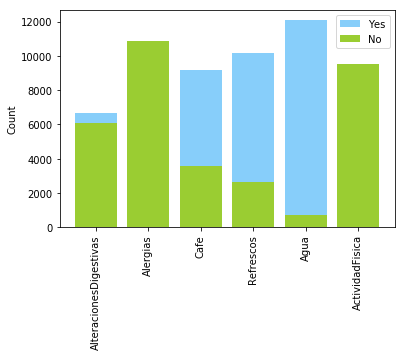

In [ ]:
list_1 = (int(nutri_init_assess_df['AlteracionesDigestivas'].sum()),
        int(nutri_init_assess_df['Alergias'].sum()),
        int(nutri_init_assess_df['Cafe'].sum()),
        int(nutri_init_assess_df['Refrescos'].sum()),
        int(nutri_init_assess_df['Agua'].sum()),
        int(nutri_init_assess_df['ActividadFisica'].sum()))

list_0 = (int(nutri_init_assess_df['AlteracionesDigestivas'].count()-nutri_init_assess_df['AlteracionesDigestivas'].sum()),
        int(nutri_init_assess_df['Alergias'].count() - nutri_init_assess_df['Alergias'].sum()),
        int(nutri_init_assess_df['Cafe'].count() -nutri_init_assess_df['Cafe'].sum()),
        int(nutri_init_assess_df['Refrescos'].count() -nutri_init_assess_df['Refrescos'].sum()),
        int(nutri_init_assess_df['Agua'].count() -nutri_init_assess_df['Agua'].sum()),
        int(nutri_init_assess_df['ActividadFisica'].count() -nutri_init_assess_df['ActividadFisica'].sum()))


index = np.arange(6)
p1 = plt.bar(index, list_1, color='lightskyblue')
p2 = plt.bar(index, list_0, color='yellowgreen')

plt.ylabel('Count')
plt.xticks(index,('AlteracionesDigestivas','Alergias','Cafe','Refrescos','Agua','ActividadFisica'), rotation='vertical')
plt.legend((p1[0],p2[0]),('Yes','No'))

plt.show()

We can also understnad their coffe intake as shown below. We can see that most people prefer Caffinated coffe over Decaffienated

In [ ]:
cafe_counts = pd.Index(nutri_init_assess_df['CafeTipo']).value_counts()/nutri_init_assess_df['CafeTipo'].count()*100
cafe_counts

Cafeinado       56.051164
Descafeinado    43.948836
Name: CafeTipo, dtype: float64

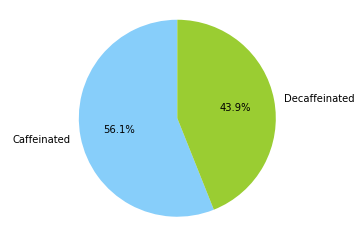

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Caffeinated', 'Decaffeinated'
sizes = cafe_counts
colors = ['lightskyblue','yellowgreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We also tried to see the spread of people consuming Alcohol and Tobacco as shown below

In [ ]:
alc_counts = pd.Index(nutri_init_assess_df['Alcohol']).value_counts()/nutri_init_assess_df['Alcohol'].count()*100
alc_counts

AUSENTE     54.675272
ACTIVO      33.731343
INACTIVO    11.593384
Name: Alcohol, dtype: float64

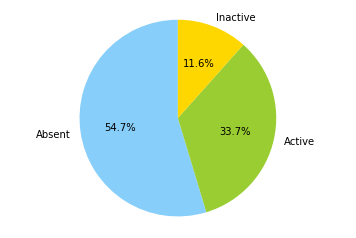

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Absent', 'Active', 'Inactive'
sizes = alc_counts
colors = ['lightskyblue','yellowgreen', 'gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
tob_counts = pd.Index(nutri_init_assess_df['Tabaco']).value_counts()/nutri_init_assess_df['Tabaco'].count()*100
tob_counts

AUSENTE     70.669037
ACTIVO      15.861345
INACTIVO    13.469619
Name: Tabaco, dtype: float64

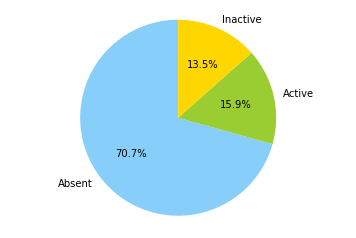

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Absent', 'Active', 'Inactive'
sizes = tob_counts
colors = ['lightskyblue','yellowgreen', 'gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Apart from this there was a column that was 'Edad' that talks about the age of the patients and hence we were able to find plot the distribution of the patients who participate depending on their age and we can see that the age ranges from very small childern to old patients. However, this spread tell that we can use statistical analysis like t-test or p-value test to identify the signifance of the variable

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


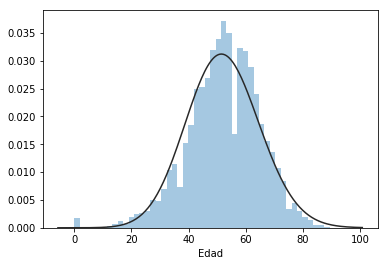

In [ ]:
nutri_init_assess_df['Edad'].fillna((nutri_init_assess_df['Edad'].mean()), inplace=True)

sns.distplot(nutri_init_assess_df['Edad'], kde=False, fit=stats.gamma)

Another thing that we found was relevant in this dataset is that is shows the kind of sugar the patient uses. However as seen below the deataset needs further refinement as there is a different way of enetering the same dataset

In [ ]:
nutri_init_assess_df['EndulzanteUtilizado'].unique()

array(['SUSTITUTO DE AZUCAR ', 'SUSTITUTO DE AZUCAR',
       'SUSTITUTO DE AZÚCAR ', ..., 'NO AGREGA AZUCAR',
       'AZÚCAR/ SPLENDA ', 'AZÚCAR NORMAL (HACE UAN SEMANA STEVIA)'],
      dtype=object)

#### 6. Hamilton Test dataset

In [ ]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'testhamilton'
nutri_hamilton_df = read_data_from_excel(filename,sheetname)

In [ ]:
# Display basic data
display_basic_data(nutri_hamilton_df)

,IdTestHamilton,IdPaciente,Fecha,Hora,P1,P2,P3,P4,P5,P6,...,P9,P10,P11,P12,P13,P14,P15,P16,P17,Usuario
0,1,768,2013-03-01,12:22:00,0,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,aab4d0015c4efadd72dd2e0f7b558c58
1,2,900,2013-03-13,11:51:00,0,0,1,0,1,0,...,0,2,0,0,2,0,0,0,0,aab4d0015c4efadd72dd2e0f7b558c58
2,3,821,2013-03-15,11:10:00,4,0,2,1,0,0,...,0,2,2,0,0,2,1,0,0,aab4d0015c4efadd72dd2e0f7b558c58
3,4,815,2013-03-16,10:14:00,3,0,2,0,1,0,...,0,1,0,2,1,0,0,0,0,aab4d0015c4efadd72dd2e0f7b558c58
4,5,910,2013-03-20,08:55:00,1,2,2,1,1,0,...,1,1,1,0,0,2,0,0,0,aab4d0015c4efadd72dd2e0f7b558c58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6047 entries, 0 to 6046
Data columns (total 22 columns):
IdTestHamilton    6047 non-null int64
IdPaciente        6047 non-null int64
Fecha             6047 non-null datetime64[ns]
Hora              6047 non-null object
P1                6047 non-null int64
P2                6047 non-null int64
P3                6047 non-null int64
P4                6047 non-null int64
P5                6047 non-null int64
P6                6047 non-null int64
P7                6047 non-null int64
P8                6047 non-null int64
P9                6047 non-null int64
P10               6047 non-null int64
P11               6047 non-null int64
P12               6047 non-null int64
P13               6047 non-null int64
P14               6047 non-null int64
P15               6047 non-null int64
P16               6047 non-null int64
P17               6047 non-null int64
Usuario           6047 non-null object
dtypes: datetime64[ns](1), int64(19), object(2

In [ ]:
# Using the built in function 'Describe' to look at the columns in dataframe
nutri_hamilton_df.describe()

,IdTestHamilton,IdPaciente,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17
count,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000
mean,3025.141062,6772.949231,0.769969,0.411940,0.195634,0.423516,0.581941,0.267075,0.355879,0.032578,0.651563,0.995204,0.796593,0.239788,0.386638,0.223747,0.335538,0.080370,0.073425
std,1746.522580,3685.906613,0.858017,0.695058,0.602339,0.666575,0.765743,0.564654,0.632423,0.268719,0.789113,0.946716,0.723845,0.444079,0.572273,0.456560,0.659066,0.330634,0.269585
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1513.500000,3724.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3025.000000,6446.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4537.500000,9607.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6050.000000,14793.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000


As we can see above that the dataset is very well spread and we also tried to plot som boxplots to see if the dataset has outliers as most of the data is numerical in nature. 

However, we require SME to help with unerstanding the P1-P17 tests as we can see that a patient doesn't have information for all these columns but has an input for some of them. We tried to look into it however, were not able to come across concrete information.

In [ ]:
print('Total no of Records:'+str(nutri_hamilton_df.shape[0]))
print('Total no of features:'+str(nutri_hamilton_df.shape[1]))

Total no of Records:6047
Total no of features:22


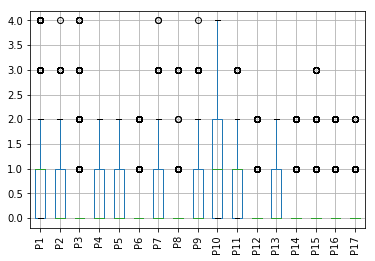

In [ ]:
boxplot = nutri_hamilton_df.boxplot(column=['P1','P2','P3','P4','P5','P6','P7','P8','P9',
                                           'P10','P11','P12','P13','P14','P15','P16','P17'],rot=90)

#### 7. Retinographies dataset

In [ ]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'retinografias'
nutri_retino_df = read_data_from_excel(filename,sheetname)

In [ ]:
# Display basic data
display_basic_data(nutri_retino_df)

,IdRetinografia,IdPaciente,Usuario,Fecha,Hora,PDF_ER,PDF_IQ,PDF_RD,PDF_RI,PDF_AC,...,RIOF_C,RI_GC,ComentariosAdicionales,ReferirA,TiempoRecomendado,ComentariosRecomendaciones,IdPagoh,fechaImpresion,horaImpresion,IdConsultorioRetino
0,4,1,8c4205ec33d8f6caeaaaa0c10a14138c,2013-07-04,22:10:46,El estudio es normal.,La calidad de la imagen es inadecuada. Debido...,Presenta retinopatía diabética en la retina de...,.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaN,NaN
1,5,690,14050103ca54aecc6e1639a4568cef15,2013-07-05,09:11:16,EL ESTUDIO ES ANORMAL.,LA CALIDAD DE LA IMAGEN ES ADECUADA.,"PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. ,...","PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. ,...",NaN,...,NaN,NaN,NaN,Oftalmología,2-3 Meses,NaN,0,NaT,NaN,NaN
2,6,266,21232f297a57a5a743894a0e4a801fc3,2013-07-05,11:41:15,El estudio es normal.,La calidad de la imagen es adecuada.,Presenta retinopatía diabética en la retina de...,Presenta retinopatía diabética en la retina iz...,POSIBLE DEGENERACION MACULAR EN AMBOS OJOS,...,NaN,NaN,POSIBLE DEGENERACION MACULAR EN AMBOS OJOS,Oftalmología,ASAP (En los próximos 5 días),NaN,0,NaT,NaN,NaN
3,7,244,21232f297a57a5a743894a0e4a801fc3,2013-07-18,17:28:27,El estudio es anormal. VFDSS,La calidad de la imagen es inadecuada. Debido...,Presenta retinopatía diabética en la retina de...,Imagen no adecuada para determinar retinopatía...,DSA FSDFASDFDS,...,VFD,FDS,DSA FSDFASDFDS,Optometría,6 Meses,DFDS SDA,0,NaT,NaN,NaN
4,8,536,908adf146969fd5dc111e43ff1037546,2013-07-19,08:49:23,El estudio es normal.,La calidad de la imagen es adecuada.,No presenta retinopatía diabética en la retina...,No presenta retinopatía diabética en la retina...,NaN,...,NaN,NaN,NaN,Sin comentarios,Sin comentarios,NaN,0,NaT,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9645 entries, 0 to 9644
Data columns (total 67 columns):
IdRetinografia                9645 non-null object
IdPaciente                    9645 non-null int64
Usuario                       9645 non-null object
Fecha                         9645 non-null datetime64[ns]
Hora                          9645 non-null object
PDF_ER                        9645 non-null object
PDF_IQ                        9510 non-null object
PDF_RD                        9645 non-null object
PDF_RI                        9645 non-null object
PDF_AC                        3567 non-null object
PDF_REC                       9645 non-null object
ERER                          9645 non-null object
ERER_C                        868 non-null object
IQ                            9510 non-null object
IQA_C                         55 non-null object
IQIASP                        273 non-null object
IQIACT                        430 non-null object
IQIABL                  

As we can see above most of the columns have a lot of missing values. But we anticipate some of them are missing as they do have that condition. For eaxample if we look at the column where patient has cataract it has only entered the values where the patient has cataract and nothing in the other rows assuming that it was left blank for people who do not have cataract

In [ ]:
# Using the built in function 'Describe' to look at the columns in dataframe
nutri_retino_df.describe()

,IdPaciente,IdPagoh,IdConsultorioRetino
count,9645.000000,9645.000000,0.0
mean,7970.214619,6050.118922,NaN
std,3757.006926,6261.452379,NaN
min,0.000000,0.000000,NaN
25%,5055.000000,0.000000,NaN
50%,7933.000000,0.000000,NaN
75%,11063.000000,12025.000000,NaN
max,14952.000000,16369.000000,NaN


In [ ]:
print('Total no of Records:'+str(nutri_retino_df.shape[0]))
print('Total no of features:'+str(nutri_retino_df.shape[1]))

Total no of Records:9645
Total no of features:67


We used the translated disctionary in the data dictionary to help us analyze this dataset

In [ ]:
# Find all the sheets that are available in the DataDictionary
filename = 'DataDictionary version 2.xlsx'
dataframe = pd.read_excel('s3://{}/{}'.format(bucketname, filename), 'retinografias', encoding = 'ISO-8859-1')
dataframe

,Field,Description
0,IdRetinografia,Id PK
1,IdPaciente,Patient ID
2,Usuario,Input User
3,Fecha,Date
4,Hora,Time
5,PDF_ER,Test Result Verbosed
6,PDF_IQ,Image quality Verbosed
7,PDF_RD,Right Retinopaty verbosed
8,PDF_RI,Left Retinopaty verbosed
9,PDF_AC,Additional Notes verbosed


We can see that the columns that have good have amount of data hence we tried to analyze the spread in those

1. PDF_ER-Test Result Verbosed
2. PDF_IQ-Image quality Verbosed
3. PDF_RD-Right Retinopaty verbosed
4. PDF_RI-Left Retinopaty verbosed

For these datasets we deepdived to see what was maintained in them

1. As we can see below that the results have been verbosed but all we wanted to see was if the result was +ve / -ve.
2. We used some string functions to help us split the data and get the relevant results
3. We then used pie charts to plot the same

However, there are some datasets that we see below that requires more refinement. However as good spread of this data can be used to analyze if it is a predictor or not

In [ ]:
nutri_retino_df['PDF_ER'].unique()

array(['el estudio es normal. ', 'el estudio es anormal. ',
       'el estudio es anormal. vfdss',
       'el estudio es anormal. jkhj kljhkl',
       'el estudio es anormal. estrechamiento arterial general de a / v cruce cambios;aumento arterial reflejo central; retinopatía hipertensiva leve',
       'el estudio es anormal. con apariencia atrófica; atrofia parapapillary significativa rodea hno también;no hay vistas de l área macular debido a las sombras',
       'el estudio es anormal. vistas limitadas de la macula',
       'el estudio es anormal. irregularidades venosas leves',
       'el estudio es normal. área macular r con algunas drusas duras, pequeña zona de posible membrana epiretinal',
       'el estudio es anormal.  posibles pequeños nevus coroideos superiores temporal',
       'el estudio es anormal.  posible aumento del reflejo arterial central con general arterialou estrechamiento; a v cruce cambio / señalar r ojo; sugestiva de hipertensión leveretinopatía',
       'no se 

In [ ]:
nutri_retino_df['PDF_ER'] = nutri_retino_df['PDF_ER'].str.lower()
nutri_retino_df['PDF_ER_first'] = nutri_retino_df['PDF_ER'].str.split('.').str[0]

test_counts = pd.Index(nutri_retino_df['PDF_ER_first']).value_counts()/nutri_retino_df['PDF_ER_first'].count()*100
test_counts

el estudio es anormal                              53.219285
el estudio es normal                               44.095386
no se pueden evaluar los resultados del estudio     2.685329
Name: PDF_ER_first, dtype: float64

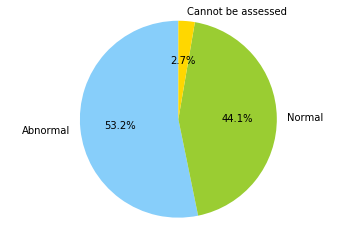

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Abnormal', 'Normal', 'Cannot be assessed'
sizes = test_counts
colors = ['lightskyblue','yellowgreen', 'gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
nutri_retino_df['PDF_IQ'].unique()

array(['la calidad de la imagen es inadecuada.  debido a: pupilas pequeñas, una catarata, está borrosa.  ',
       'la calidad de la imagen es adecuada. ',
       'la calidad de la imagen es inadecuada.  debido a: , una catarata, opacidad de la córnea.   fds ds',
       'la calidad de la imagen es inadecuada.  debido a: pupilas pequeñas.  ',
       'la calidad de la imagen es inadecuada.  debido a:  está borrosa.  imagenes no valorable',
       'la calidad de la imagen es inadecuada.  debido a:. ',
       'la calidad de la imagen es inadecuada.  debido a:  una catarata.  ',
       'la calidad de la imagen es adecuada. la calidad de imagen es adecuada. ojo r adecuada; inadecuada ojo l debido a muchas pestañasartefactos y sin mácula vista clara',
       nan,
       'la calidad de la imagen es inadecuada.  debido a:  opacidad de la córnea.  ',
       'la calidad de la imagen es inadecuada.  debido a: pupilas pequeñas, una catarata.  se sugiere un examen dilatado',
       'la calidad de la

In [ ]:
nutri_retino_df['PDF_IQ'] = nutri_retino_df['PDF_IQ'].str.lower()
nutri_retino_df['PDF_IQ_first'] = nutri_retino_df['PDF_IQ'].str.split('.').str[0]

img_counts = pd.Index(nutri_retino_df['PDF_IQ_first']).value_counts()/nutri_retino_df['PDF_IQ_first'].count()*100
img_counts

la calidad de la imagen es adecuada      89.884332
la calidad de la imagen es inadecuada    10.115668
Name: PDF_IQ_first, dtype: float64

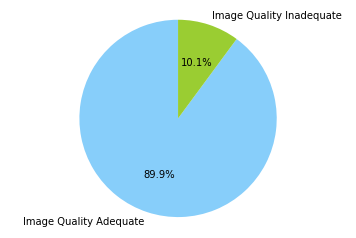

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Image Quality Adequate', 'Image Quality Inadequate'
sizes = img_counts
colors = ['lightskyblue','yellowgreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
nutri_retino_df['PDF_RD'].unique()

array(['Presenta retinopatía diabética en la retina derecha. Retinopatía diabética leve no proliferativa en el ojo derecho, Retinopatía diabética moderada no proliferativa en el ojo derecho, Retinopatía diabética severa no proliferativa en el ojo derecho, Retinopatía diabética proliferativa en el ojo derecho.  ',
       'PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. , RETINOPATíA DIABéTICA MODERADA NO PROLIFERATIVA EN EL OJO, . , , . ',
       'Presenta retinopatía diabética en la retina derecha.  Retinopatía diabética moderada no proliferativa en el ojo derecho.   Existe Retinopatía HTN en el ojo.  ',
       'Presenta retinopatía diabética en la retina derecha.  Retinopatía diabética moderada no proliferativa en el ojo derecho, Retinopatía diabética severa no proliferativa en el ojo derecho, Retinopatía diabética proliferativa en el ojo derecho.  DSVSDDF DJ. SVFDS FDDFV.  Se sospecha de un Glaucoma, Existe Retinopatía HTN en el ojo, Coriorretinitis presente en el ojo. DASFDSA DS.  FDSA

In [ ]:
nutri_retino_df['PDF_RD'] = nutri_retino_df['PDF_RD'].str.lower()
nutri_retino_df['PDF_RD_first'] = nutri_retino_df['PDF_RD'].str.split('.').str[0]

right_ret_counts = pd.Index(nutri_retino_df['PDF_RD_first']).value_counts()/nutri_retino_df['PDF_RD_first'].count()*100
right_ret_counts

no presenta retinopatía diabética en la retina derecha                 63.483670
presenta retinopatía diabética en la retina derecha                    30.295490
                                                                        3.151892
imagen no adecuada para determinar retinopatía en la retina derecha     2.975635
*monocular*                                                             0.082945
presenta retinopatía diabética en la retina                             0.010368
Name: PDF_RD_first, dtype: float64

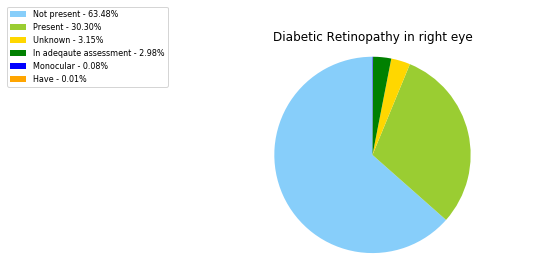

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not present', 'Present', 'Unknown', 'In adeqaute assessment', 'Monocular', 'Have'
sizes = right_ret_counts
colors = ['lightskyblue','yellowgreen','gold','green','blue','orange']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


labels = ['{0} - {1:1.2f}%'.format(i,j) for i,j in zip(labels, sizes)]

plt.legend(labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)



plt.title('Diabetic Retinopathy in right eye')
plt.show()

In [ ]:
nutri_retino_df['PDF_RI'].unique()

array(['. ',
       'PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. , RETINOPATíA DIABéTICA MODERADA NO PROLIFERATIVA EN EL OJO, . , , . ',
       'Presenta retinopatía diabética en la retina izquierda.  Retinopatía diabética moderada no proliferativa en el ojo izquierdo.   Existe Retinopatía HTN en el ojo.  ',
       'Imagen no adecuada para determinar retinopatía en la retina izquierda. FD FDS GFD.  Existe Retinopatía HTN en el ojo, Drusen presente en el ojo, Coriorretinitis presente en el ojo.  VFD.  FDS ',
       'No presenta retinopatía diabética en la retina izquierda. ',
       'Presenta retinopatía diabética en la retina izquierda.  Retinopatía diabética severa no proliferativa en el ojo izquierdo.   Existe Retinopatía HTN en el ojo.  ',
       'No presenta retinopatía diabética en la retina izquierda.  Existe Retinopatía HTN en el ojo.  SOSPECHA DE GLAUCOMA. ',
       'No presenta retinopatía diabética en la retina izquierda.  , Drusen presente en el ojo.  ',
       'Presenta re

In [ ]:
nutri_retino_df['PDF_RI'] = nutri_retino_df['PDF_RI'].str.lower()
nutri_retino_df['PDF_RI_first'] = nutri_retino_df['PDF_RI'].str.split('.').str[0]

left_ret_counts = pd.Index(nutri_retino_df['PDF_RI_first']).value_counts()/nutri_retino_df['PDF_RI_first'].count()*100
left_ret_counts

no presenta retinopatía diabética en la retina izquierda                 64.053914
presenta retinopatía diabética en la retina izquierda                    29.248315
                                                                          3.514774
imagen no adecuada para determinar retinopatía en la retina izquierda     3.068948
*monocular*                                                               0.103681
presenta retinopatía diabética en la retina                               0.010368
Name: PDF_RI_first, dtype: float64

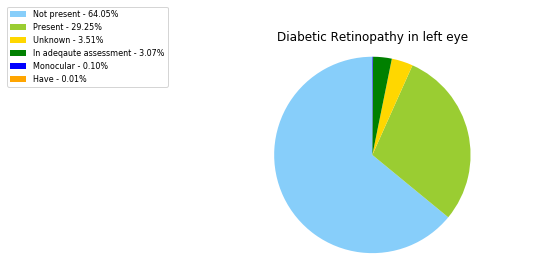

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not present', 'Present', 'Unknown', 'In adeqaute assessment', 'Monocular', 'Have'
sizes = left_ret_counts
colors = ['lightskyblue','yellowgreen','gold','green','blue','orange']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


labels = ['{0} - {1:1.2f}%'.format(i,j) for i,j in zip(labels, sizes)]

plt.legend(labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.title('Diabetic Retinopathy in left eye')
plt.show()

In [ ]:
print('Total % of patients that are tested positive to have cataract are:'
      +str(round(nutri_retino_df['RIOFCA'].count()/(nutri_retino_df['RIOFCA'].count()+nutri_retino_df['RIOFCA'].isnull().values.ravel().sum())*100))+'%')

Total % of patients that are tested positive to have cataract are:11.0%
